In [1]:
!pip install pandas numpy matplotlib seaborn scikit-learn xgboost

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler

In [3]:
fuel_data = pd.read_csv("fuel.csv")
sales_data = pd.read_csv("sales.csv")
weather_data = pd.read_csv("weather.csv")

In [4]:
sales_data.head(10)

,Store,Category,Date,Weekly_Sales,Holiday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
5,1,1,2010-03-12,21043.39,False
6,1,1,2010-03-19,22136.64,False
7,1,1,2010-03-26,26229.21,False
8,1,1,2010-04-02,57258.43,False
9,1,1,2010-04-09,42960.91,False


In [5]:
sales_data.describe()

,Store,Category,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [6]:
fuel_data.head(10)

,Store,Date,Fuel_Price
0,1,2010-02-05,2.572
1,1,2010-02-12,2.548
2,1,2010-02-19,2.514
3,1,2010-02-26,2.561
4,1,2010-03-05,2.625
5,1,2010-03-12,2.667
6,1,2010-03-19,2.720
7,1,2010-03-26,2.732
8,1,2010-04-02,2.719
9,1,2010-04-09,2.770


In [7]:
fuel_data.describe()

,Store,Fuel_Price
count,8190.000000,8190.000000
mean,23.000000,3.405992
std,12.987966,0.431337
min,1.000000,2.472000
25%,12.000000,3.041000
50%,23.000000,3.513000
75%,34.000000,3.743000
max,45.000000,4.468000


In [8]:
weather_data.head(10)

,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
5,1,2010-03-12,57.79
6,1,2010-03-19,54.58
7,1,2010-03-26,51.45
8,1,2010-04-02,62.27
9,1,2010-04-09,65.86


In [9]:
weather_data.describe()

,Store,Temperature
count,8190.000000,8190.000000
mean,23.000000,59.356198
std,12.987966,18.678607
min,1.000000,-7.290000
25%,12.000000,45.902500
50%,23.000000,60.710000
75%,34.000000,73.880000
max,45.000000,101.950000


In [10]:
# Missing and Incorrect Values in Sales Data 
sales_data.isnull().sum()
sales_data[(sales_data['Category'] <= 0)]
sales_data[(sales_data['Store'] <= 0)]

,Store,Category,Date,Weekly_Sales,Holiday


In [11]:
# Missing and Incorrect Values in Weather Data
weather_data.isnull().sum()
weather_data[(weather_data['Store'] <= 0)]

,Store,Date,Temperature


In [12]:
# Missing and Incorrect Values in Fuel Data
fuel_data.isnull().sum()
fuel_data[(fuel_data['Store'] <= 0)]
fuel_data[(fuel_data['Fuel_Price'] <= 0)]

,Store,Date,Fuel_Price


In [13]:
# Merge datasets
merged_data = pd.merge(sales_data, weather_data, on=['Date','Store'])
merged_data = pd.merge(merged_data, fuel_data, on=['Date','Store'])

In [14]:
# Remove statistical outliers (z-score over 3)
merged_data = merged_data[merged_data['Weekly_Sales'] > 300]

In [15]:
# View merged data
merged_data.dropna(inplace=True)
merged_data.describe()

,Store,Category,Weekly_Sales,Temperature,Fuel_Price
count,378856.000000,378856.000000,378856.000000,378856.000000,378856.000000
mean,21.606090,43.920294,17772.984457,59.711767,3.358585
std,12.632386,31.032039,23286.608157,18.404889,0.458200
min,1.000000,1.000000,300.010000,-2.060000,2.472000
25%,11.000000,17.000000,3383.247500,46.380000,2.924000
50%,21.000000,36.000000,9297.665000,61.640000,3.452000
75%,32.000000,74.000000,22482.022500,73.880000,3.737000
max,45.000000,99.000000,693099.360000,100.140000,4.468000


In [16]:
# View count of unique values in each column
merged_data.nunique()

Store               45
Category            76
Date               143
Weekly_Sales    343596
Holiday              2
Temperature       3528
Fuel_Price         892
dtype: int64

In [17]:
# Remove rows with missing values
merged_data = merged_data.dropna()

In [18]:
# Round Temperature to nearest integer
merged_data['Temperature'] = merged_data['Temperature'].astype(int)

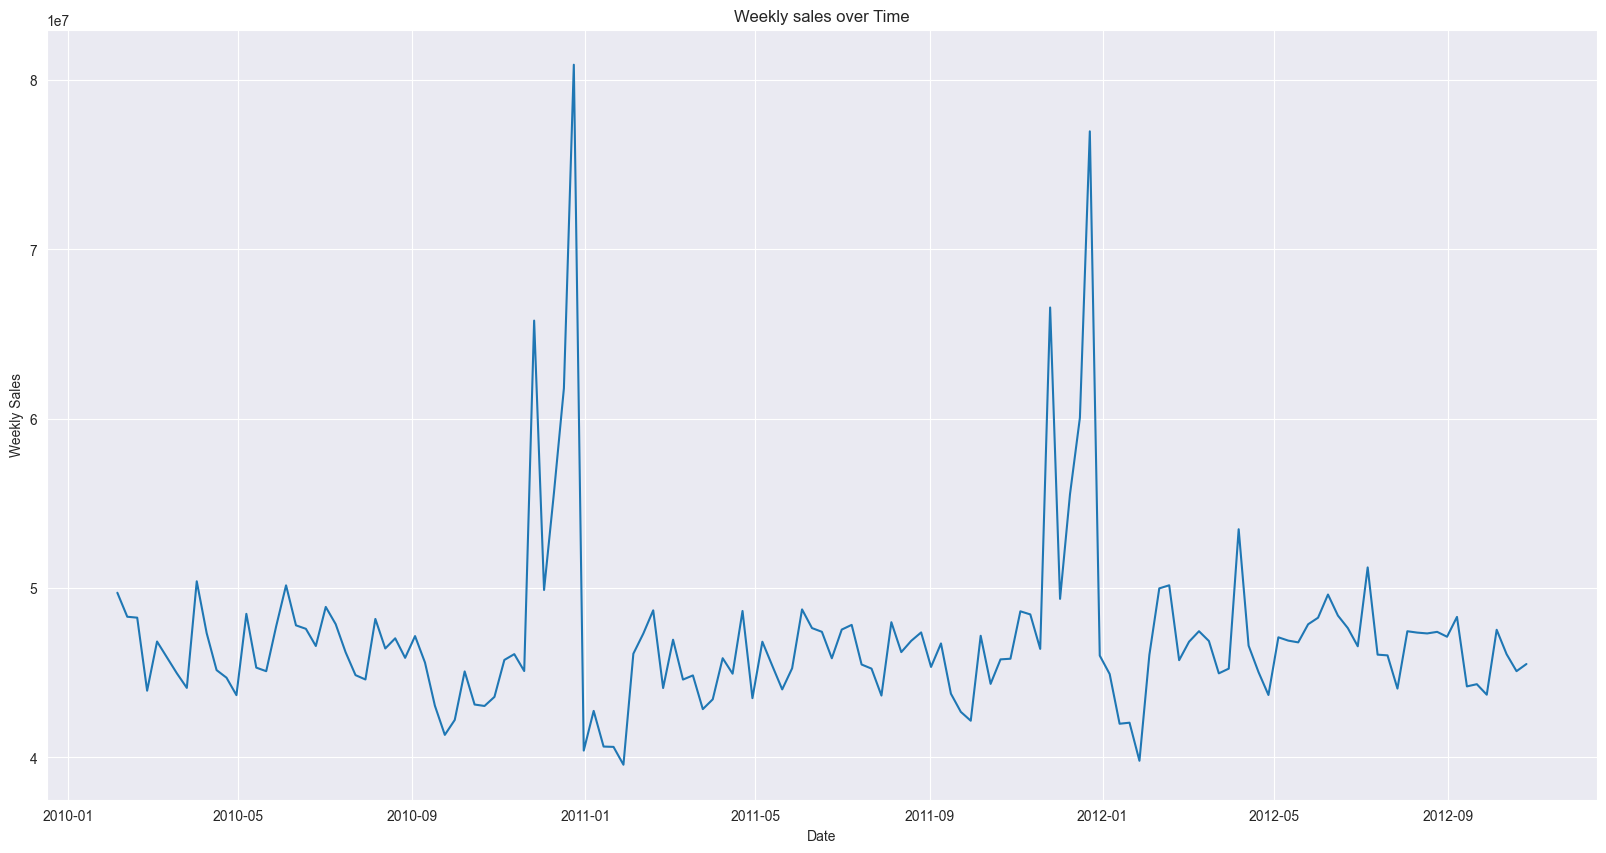

In [19]:
# 1
plt.figure(figsize=(20,10))
merged_data["Datetime"] = pd.to_datetime(merged_data["Date"])
Weekly_sales_change = merged_data.groupby("Datetime")["Weekly_Sales"].sum()
plt.plot(Weekly_sales_change.index, Weekly_sales_change.values)
plt.title("Weekly sales over Time")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.savefig("1- Weekly sales over Time.png")
plt.show()

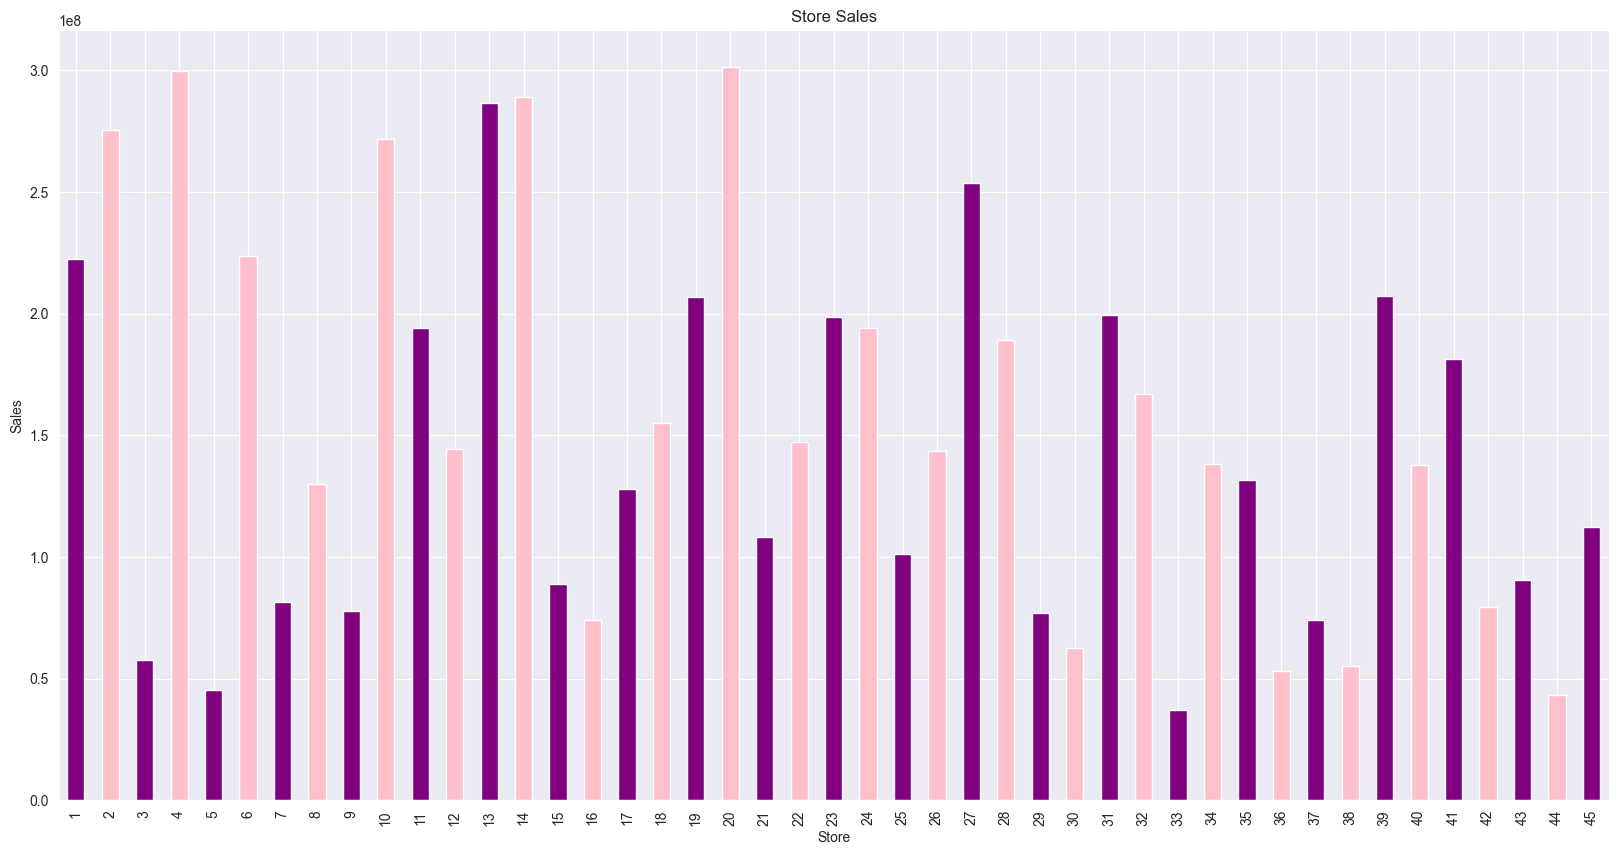

In [20]:
# 2
plt.figure(figsize=(20,10))
store_Sales = merged_data.groupby("Store")["Weekly_Sales"].sum()
store_Sales.plot(kind="bar",color=["purple","pink"])
plt.title("Store Sales")
plt.xlabel("Store")
plt.ylabel("Sales")
plt.savefig("2- Store Sales.png")
plt.show()

In [21]:
#3
store_Sales.sort_values(ascending=False,inplace=True)
top_ten_stores = store_Sales.nlargest(10)
print('Top 10 stores in sales:')
print(top_ten_stores)

Top 10 stores in sales:
Store
20    3.013805e+08
4     2.995141e+08
14    2.889554e+08
13    2.864939e+08
2     2.753477e+08
10    2.715510e+08
27    2.538079e+08
6     2.237117e+08
1     2.223671e+08
39    2.074110e+08
Name: Weekly_Sales, dtype: float64


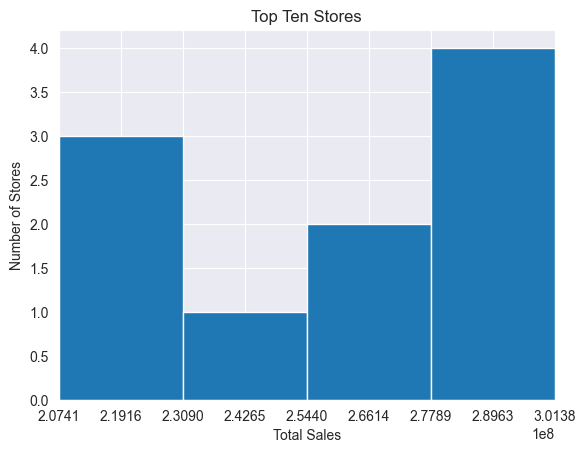

In [22]:
# 4
top_ten_stores.hist(bins=4)
plt.title("Top Ten Stores")
plt.xlabel("Total Sales")
plt.ylabel("Number of Stores")
minVal = top_ten_stores.min()
maxVal = top_ten_stores.max()
plt.xlim(minVal, maxVal)
plt.xticks(np.arange(minVal, maxVal + 0.01, step=(maxVal-minVal)/8))
plt.savefig("4- Top Ten Stores.png")
plt.show()

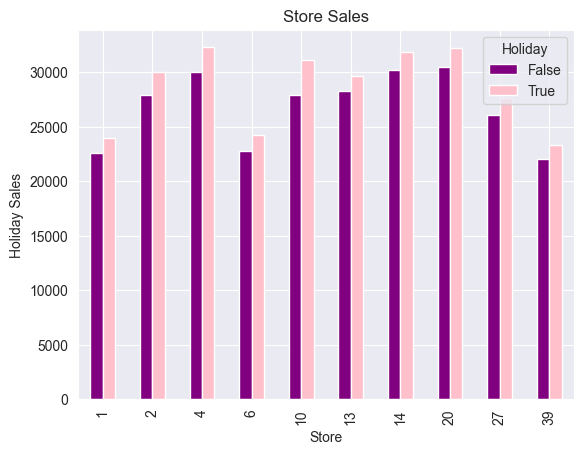

In [23]:
# 5
top_stores_sales = merged_data[merged_data['Store'].isin(top_ten_stores.index)]
Holiday_sales = top_stores_sales.groupby(["Store","Holiday"])["Weekly_Sales"].mean().unstack()
Holiday_sales.plot(kind="bar",color=["purple","pink"])
plt.title("Store Sales")
plt.xlabel("Store")
plt.ylabel("Holiday Sales")
plt.savefig("5- Top Ten Stores Sales (Holiday).png")
plt.show()

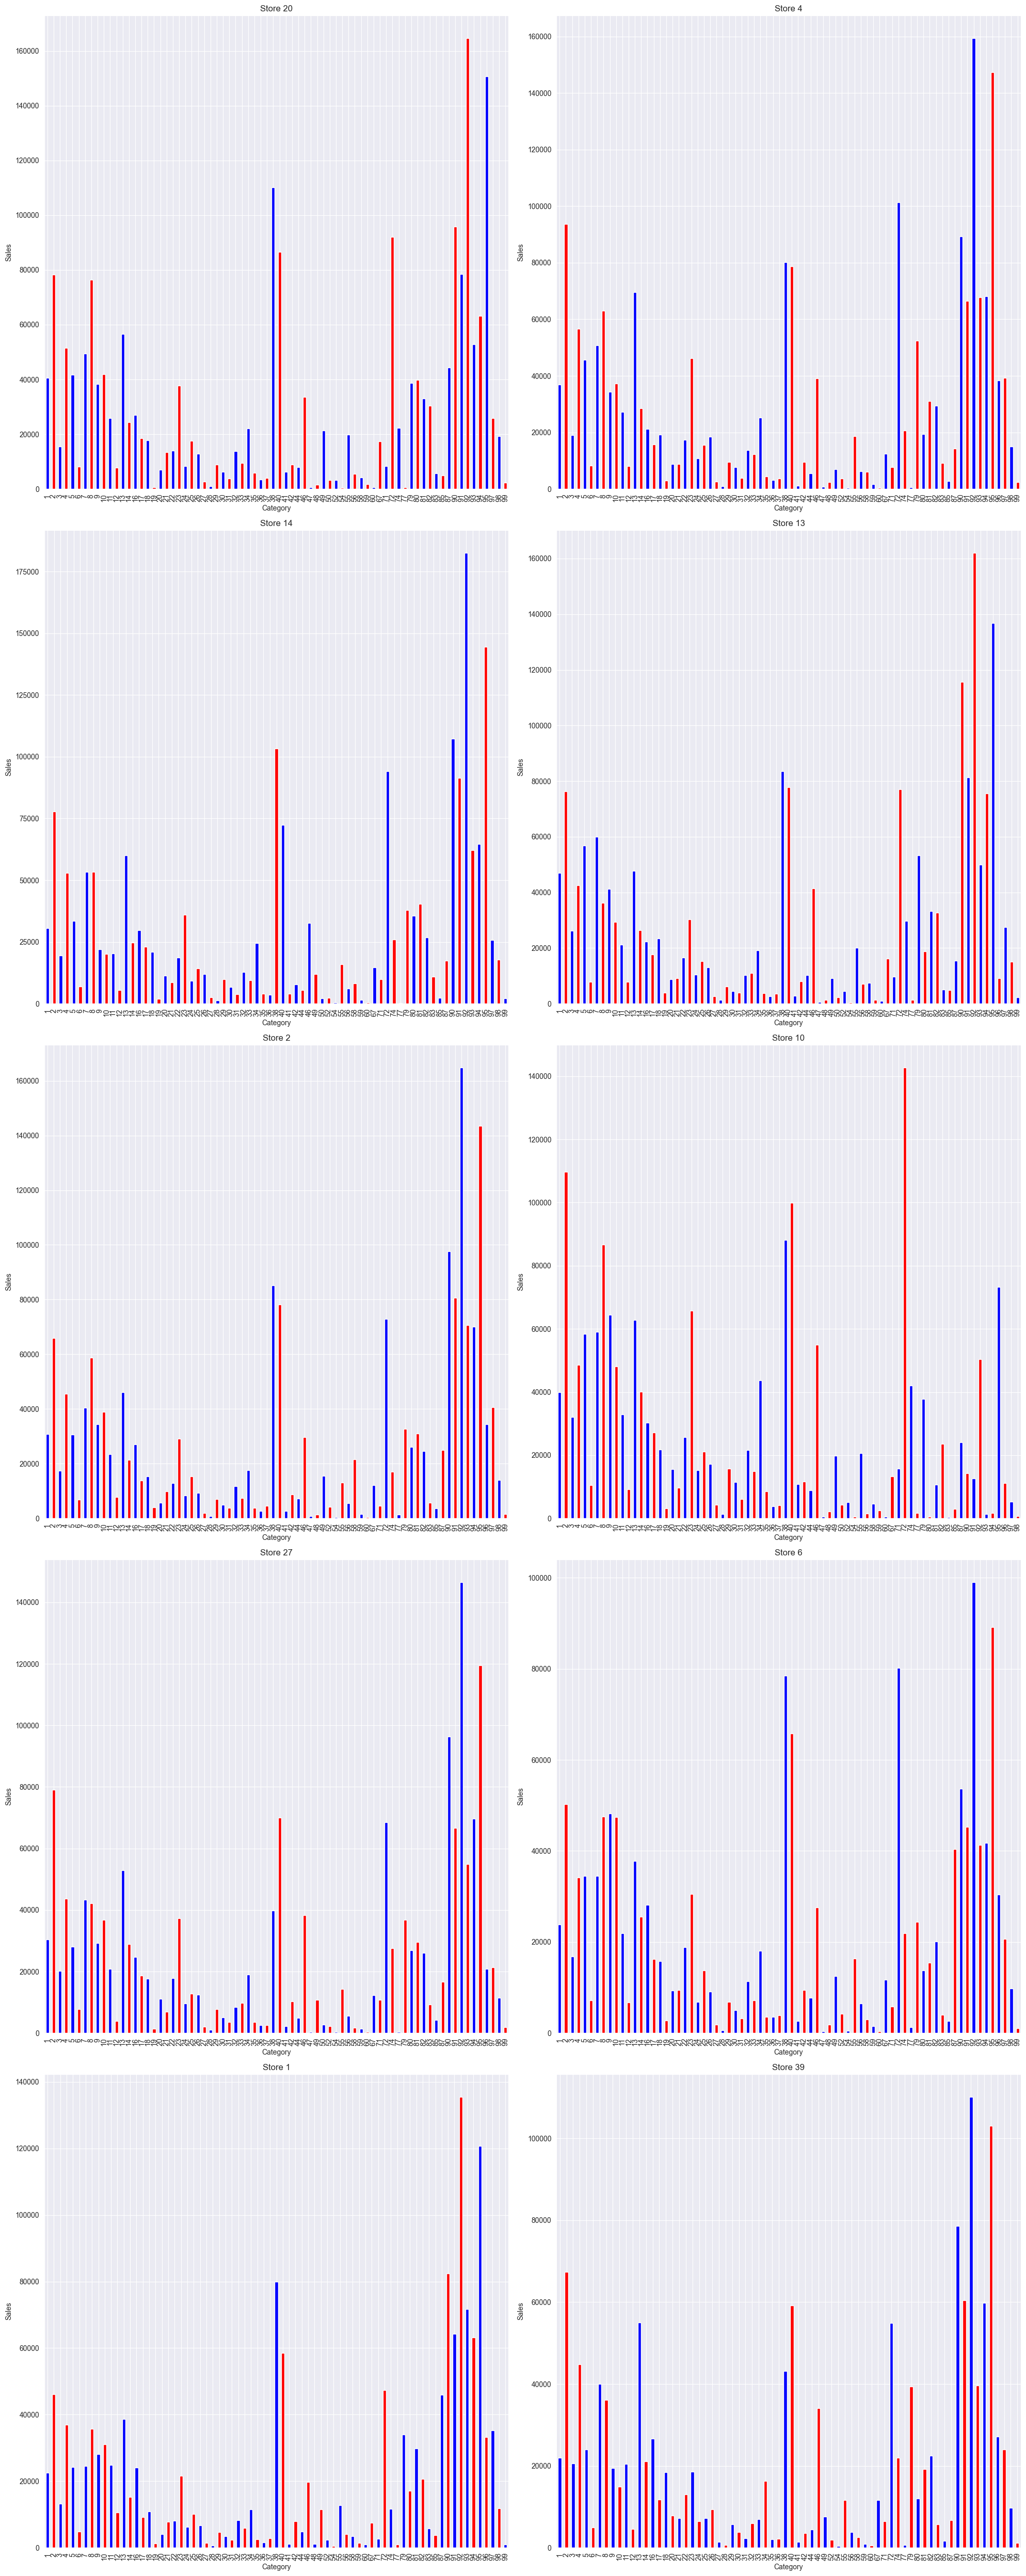

In [24]:
# 6
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 50))
axes = axes.flatten()
for i, ax in enumerate(axes):
    top_store = top_ten_stores.index[i]
    top_store_sales = merged_data[merged_data['Store'] == top_store]
    brand_department_sales = top_store_sales.groupby(["Category"])["Weekly_Sales"].mean()
    brand_department_sales.plot(kind="bar", ax=ax, color=["blue", "red"])
    ax.set_title("Store " + str(top_store))
    ax.set_xlabel("Category")
    ax.set_ylabel("Sales")
    ax.legend().remove()
plt.tight_layout()
plt.savefig("6- Top Ten Stores Sales (Category).png")
plt.show()

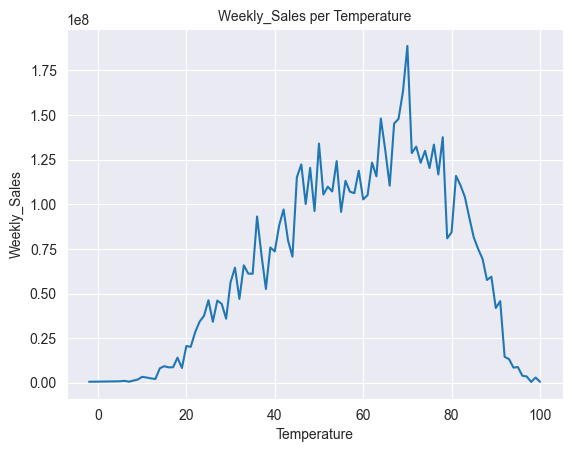

In [25]:
# 7
merged_data.groupby('Temperature')['Weekly_Sales'].sum().plot()
plt.title('Weekly_Sales per Temperature',fontsize=10)
plt.xlabel('Temperature',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.savefig("7- Weekly_Sales per Temperature.png")

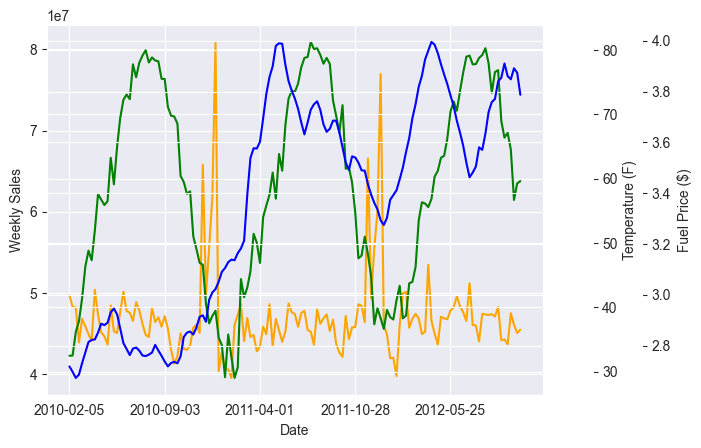

In [26]:
# 8
fig, ax1 = plt.subplots()
Weekly_sales_date = merged_data.groupby("Date")["Weekly_Sales"].sum()
ax1.plot(Weekly_sales_date.index, Weekly_sales_date.values, color="orange", label="Weekly Sales")
ax1.set_xlabel("Date")
ax1.set_ylabel("Weekly Sales")

ax2 = ax1.twinx()
Temperature_date = merged_data.groupby("Date")["Temperature"].mean()
ax2.plot(Temperature_date.index, Temperature_date.values, color="green", label="Temperature")
ax2.set_ylabel("Temperature (F)")

ax3 = ax1.twinx()
Fuel_price_date = merged_data.groupby("Date")["Fuel_Price"].mean()
ax3.plot(Fuel_price_date.index, Fuel_price_date.values, color="blue", label="Fuel Price")
ax3.set_ylabel("Fuel Price ($)")


ax2.spines['right'].set_position(('axes', 1.1))
ax3.spines['right'].set_position(('axes', 1.2))
ticks = ax1.get_xticks()
new_ticks = [ticks[i] for i in range(len(ticks)) if i%30 == 0]
ax1.set_xticks(new_ticks)
plt.savefig("8- Weekly Sales, Temperature, and Fuel Price over Time.png")
plt.show()

In [27]:
# Convert date to a format that we can work with
def date_to_week(date_str):
    date = dt.datetime.strptime(date_str, '%Y-%m-%d')
    week_number = date.isocalendar()[1]
    return week_number
WeekOfTheYear = merged_data['Date'].apply(date_to_week)
merged_data['WeekOfTheYear'] = WeekOfTheYear
merged_data.drop(['Datetime', 'Date'], axis=1, inplace=True)

<Figure size 2000x2000 with 0 Axes>

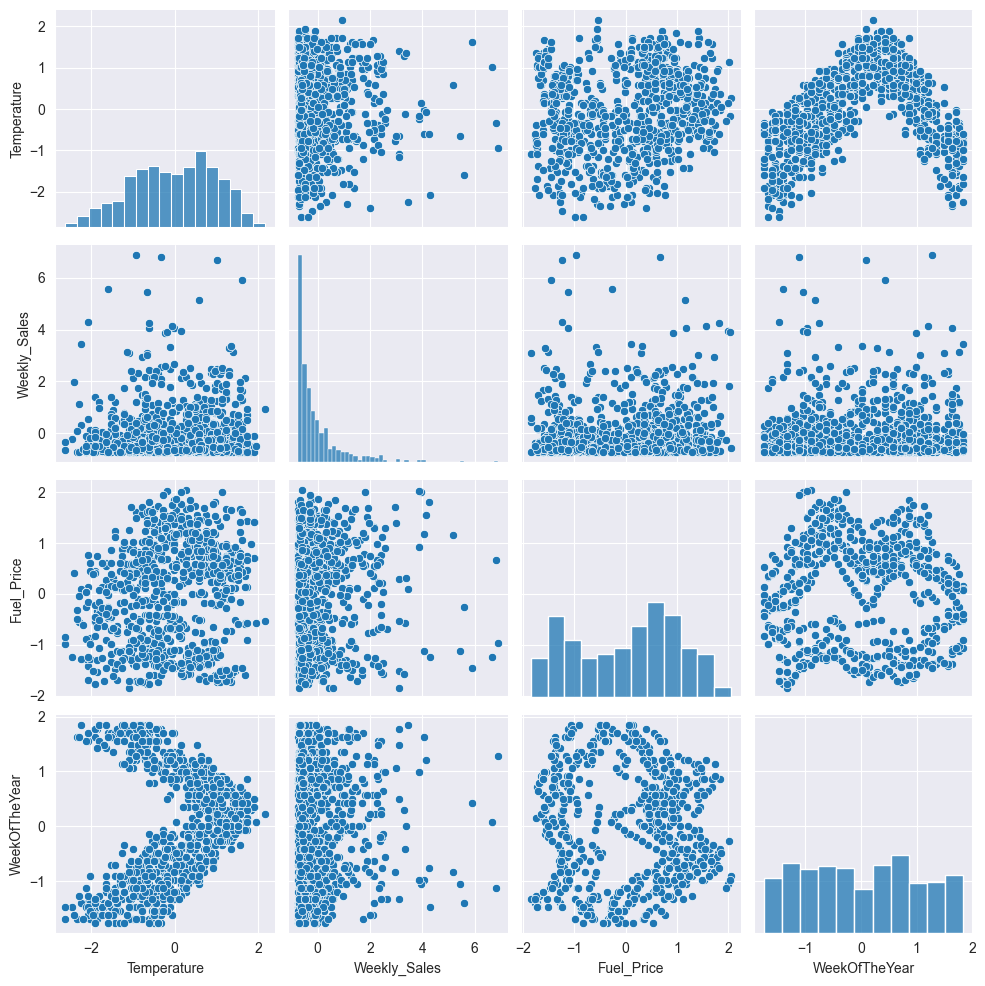

In [28]:
# 9
Scaler = StandardScaler()
columns = ['Temperature', 'Weekly_Sales', 'Fuel_Price', 'WeekOfTheYear']
copy = merged_data.copy()
copy[columns] = Scaler.fit_transform(merged_data[columns])
plt.figure(figsize=(20,20))
sns.pairplot(copy[columns].sample(1000))
plt.savefig("9- Pairplot.png")
plt.show()

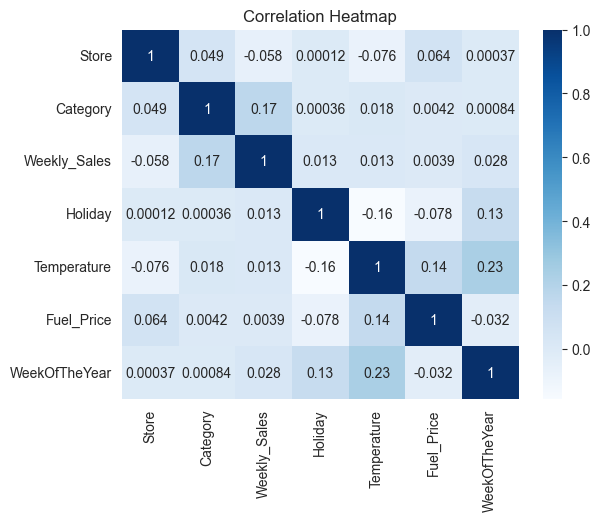

In [29]:
merged_data.isnull().sum()
corr = merged_data.corr()
sns.heatmap(corr, annot=True, cmap='Blues').set_title('Correlation Heatmap')
plt.savefig("Correlation Heatmap.png")
plt.show()

In [30]:
# Initialize the linear regression class
linear_regression = LinearRegression()

In [31]:
# Split the data into training and testing sets for Linear Regression
train_x, test_x, train_y, test_y = train_test_split(merged_data.drop(['Temperature', 'Weekly_Sales', 'Fuel_Price', 'WeekOfTheYear'], inplace=False, axis=1), merged_data['Weekly_Sales'], test_size=0.2, random_state=0)

In [32]:
# Fit the model
linear_regression.fit(train_x, train_y)

LinearRegression()

In [33]:
# Calculate the predictions for the test set and calculate measures of error [Linear Regression]
y_p = linear_regression.predict(test_x)

print('Mean Absolute Error:', mean_absolute_error(test_y, y_p))
print('Mean Squared Error:', mean_squared_error(test_y, y_p))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_p)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, y_p), '%')
print('R2 score:', r2_score(test_y, y_p) * 100, '%')
linearError = [mean_absolute_percentage_error(test_y, y_p), r2_score(test_y, y_p) * 100]

Mean Absolute Error: 15632.170861346602
Mean Squared Error: 527408749.1680182
Root Mean Squared Error: 22965.381537610436
Mean Absolute Percentage Error: 4.6833322979876355 %
R2 score: 3.2610425373168495 %


In [34]:
# Split the data into training and testing sets for non-linear estimators
train_x, test_x, train_y, test_y = train_test_split(merged_data.drop(['Weekly_Sales'], inplace=False, axis=1), merged_data['Weekly_Sales'], test_size=0.2, random_state=0)

In [35]:
# Initialize the random forest regressor
random_forest = RandomForestRegressor(n_estimators=100)

In [36]:
# Fit the model
random_forest.fit(train_x, train_y)

RandomForestRegressor()

In [37]:
# Calculate the predictions for the test set and calculate measures of error [Random Forest]
y_p = random_forest.predict(test_x)
# generate test metrics
print('Mean Absolute Error:', mean_absolute_error(test_y, y_p))
print('Mean Squared Error:', mean_squared_error(test_y, y_p))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_p)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, y_p), '%')
print('R2 score:', r2_score(test_y, y_p) * 100, '%')
randomForestError = [mean_absolute_percentage_error(test_y, y_p), r2_score(test_y, y_p) * 100]

Mean Absolute Error: 1736.4258906931323
Mean Squared Error: 19268837.733464908
Root Mean Squared Error: 4389.628427721976
Mean Absolute Percentage Error: 0.16655097122326457 %
R2 score: 96.46564969429589 %


In [38]:
xgboost = XGBRegressor(n_estimators=100)
xgboost.fit(train_x, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [39]:
y_p = xgboost.predict(test_x)
# generate test metrics
print('Mean Absolute Error:', mean_absolute_error(test_y, y_p))
print('Mean Squared Error:', mean_squared_error(test_y, y_p))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(test_y, y_p)))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(test_y, y_p), '%')
print('R2 score:',r2_score(test_y, y_p) * 100, '%')
XGBoostError = [mean_absolute_percentage_error(test_y, y_p), r2_score(test_y, y_p) * 100]

Mean Absolute Error: 3751.3522344930307
Mean Squared Error: 39285028.71486795
Root Mean Squared Error: 6267.777015407292
Mean Absolute Percentage Error: 0.8121234276875631 %
R2 score: 92.79421752528191 %


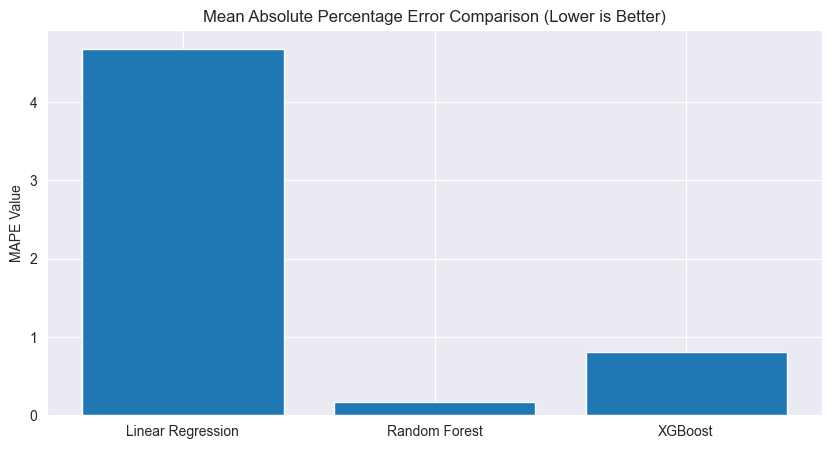

In [40]:
# Plot MAPE for each model
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Random Forest', 'XGBoost'], [linearError[0], randomForestError[0], XGBoostError[0]])
plt.title('Mean Absolute Percentage Error Comparison (Lower is Better)')
plt.ylabel('MAPE Value')
plt.savefig("MAPE Values.png")
plt.show()

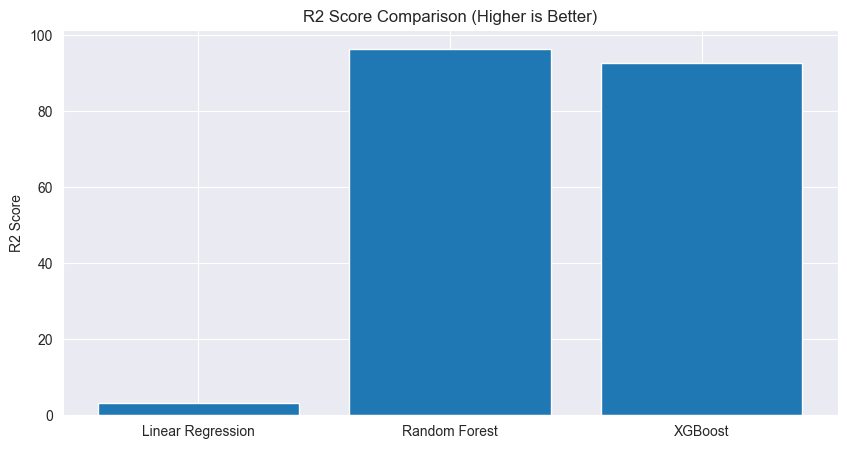

In [41]:
# Plot R2 for each model
plt.figure(figsize=(10, 5))
plt.bar(['Linear Regression', 'Random Forest', 'XGBoost'], [linearError[1], randomForestError[1], XGBoostError[1]])
plt.title('R2 Score Comparison (Higher is Better)')
plt.ylabel('R2 Score')
plt.savefig("R2 Scores.png")
plt.show()

In [42]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

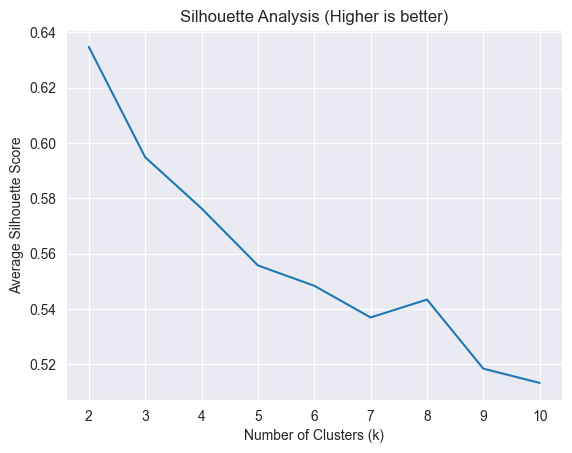

In [43]:
# Define the range of cluster numbers to evaluate
cluster_range = range(2, 11)

# Scale Weekly Sales
data = merged_data[['Category', 'Weekly_Sales']].groupby('Category')['Weekly_Sales'].mean().reset_index()
scaler = StandardScaler()
data['Weekly_Sales'] = scaler.fit_transform(data[['Weekly_Sales']])

# Initialize an empty list to store the average silhouette scores for each k
silhouette_scores = []
k_values = []

# Perform clustering and calculate the silhouette scores for each value of k
for k in cluster_range:
    # Fit K-means clustering model
    kmeans = KMeans(n_clusters=k, n_init=50, init='k-means++')
    cluster_labels = kmeans.fit_predict(data)
    # Calculate silhouette score
    silhouette_avg = silhouette_score(data, cluster_labels)
    k_values.append(k)
    silhouette_scores.append(silhouette_avg)

# Plot the silhouette scores
plt.plot(k_values, silhouette_scores)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.title('Silhouette Analysis (Higher is better)')
plt.savefig("Silhouette Analysis.png")
plt.show()

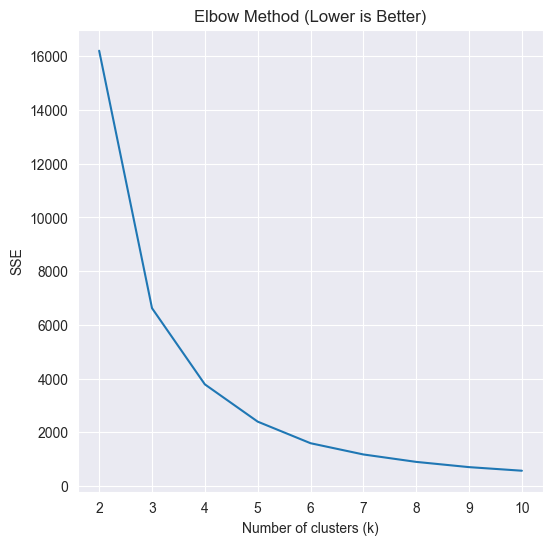

In [44]:
# Use the elbow method and SSE to find the optimal number of clusters
sse = []

for k in cluster_range:
    km = KMeans(n_clusters=k, n_init=50, init='k-means++')
    km.fit(data)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(cluster_range, sse)
plt.title('Elbow Method (Lower is Better)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.savefig("Elbow Method.png")
plt.show()

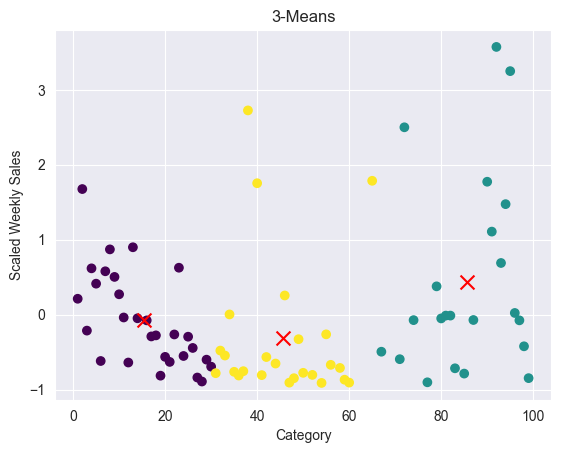

0      1
1      2
2      3
3      4
4      5
      ..
71    95
72    96
73    97
74    98
75    99
Name: Category, Length: 76, dtype: int64

In [45]:
# Initialize the K-means clustering model
kmeans = KMeans(n_clusters=3, n_init=50, init='k-means++')
cluster_labels = kmeans.fit_predict(data)
centroids = kmeans.cluster_centers_
plt.scatter(data['Category'], data['Weekly_Sales'], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=100, color='red')
plt.xlabel('Category')
plt.ylabel('Scaled Weekly Sales')
plt.title('3-Means')
plt.savefig("K-Means Clustering.png")
plt.show()
data['Category']